In [9]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as pjoin
import os.path as osp

%matplotlib inline

In [2]:
#functions to be used later

def slice_avg(data_orig, nvols, nslices):
    #reshapes the long trajectory into params x nslices x nvols
    #averages over the slices to create a new trajectory    
    data_3d = np.reshape(data_orig, (nvols,nslices,6))
    data_new = np.mean(data_3d, axis=1) #avg over slice dimension
    return data_new

def plot_motion(data, traj):
    #plots motion params for translations and rotations
    fig = plt.figure(figsize=(16,12))
    #plot translations
    ax = fig.add_subplot(1,2,1)
    ax.plot(data[:,0:3])
    plt.title('translation')
    #plot rotations
    ax = fig.add_subplot(1,2,2)
    ax.plot(data[:,3:7])
    plt.title('rotation')
    plt.suptitle(traj) #plot which trajectory
    plt.show()

def get_data_orig(data_filename, keep_rows=30*500, rm_col_0=True):
    # return numpy array with keep_rows rows 
    data_orig = np.loadtxt(data_filename)
    if rm_col_0:
        data_orig = data_orig[:,1:]
    return data_orig[0:keep_rows]
    

In [3]:
#setup location of trajectories
traj_dir = '.'
traj_site = 'VA'
data_dir = pjoin(traj_dir, 'trajectories_from_%s' %(traj_site))

In [4]:
#setup trajectory info - manual
nslices = 30
nvols = 500
trajectories = ['mp_013', 'mp_026', 'mp_028']
orig_fnames = dict(mp_013 = 'motion_params_013.dat', 
                   mp_026 = 'motion_params_026.dat', 
                   mp_028 = 'motion_params_028.dat')
new_fnames = dict(mp_013 = 'mp_sliceavg_013.txt', 
                   mp_026 = 'mp_sliceavg_026.txt', 
                   mp_028 = 'mp_sliceavg_028.txt')

mp_013 (15000, 6)


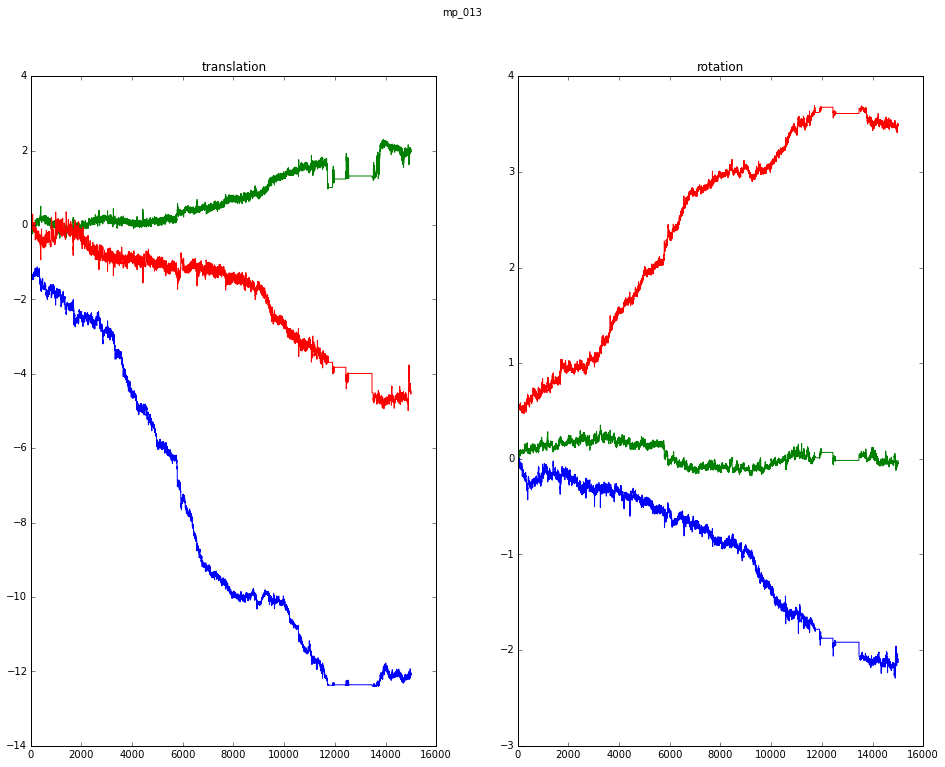

mp_026 (15000, 6)


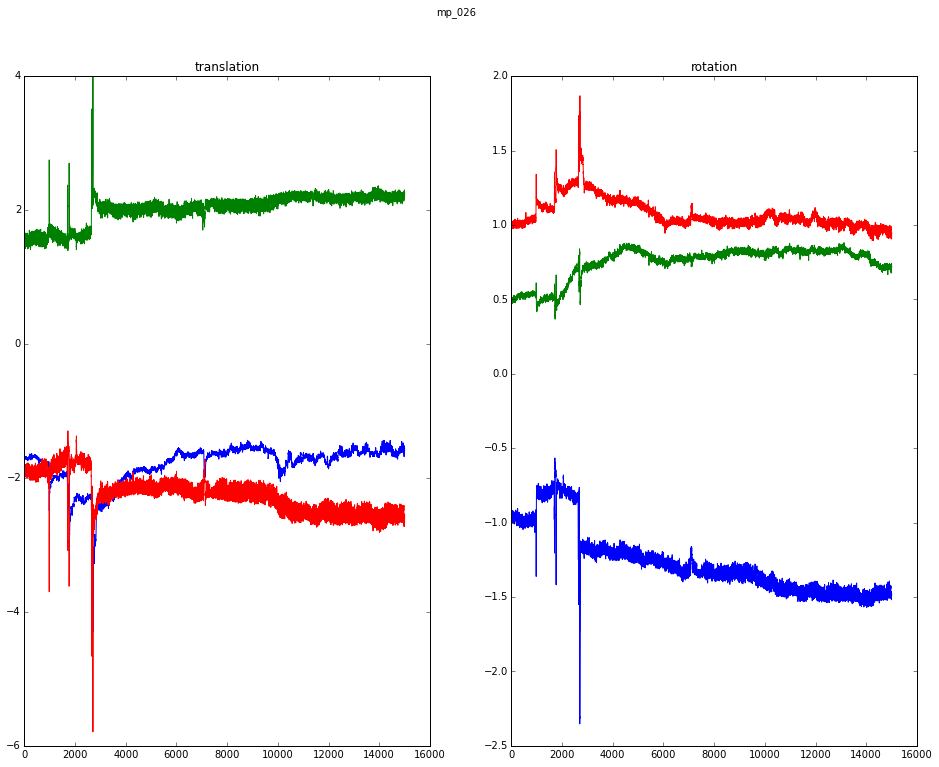

mp_028 (15000, 6)


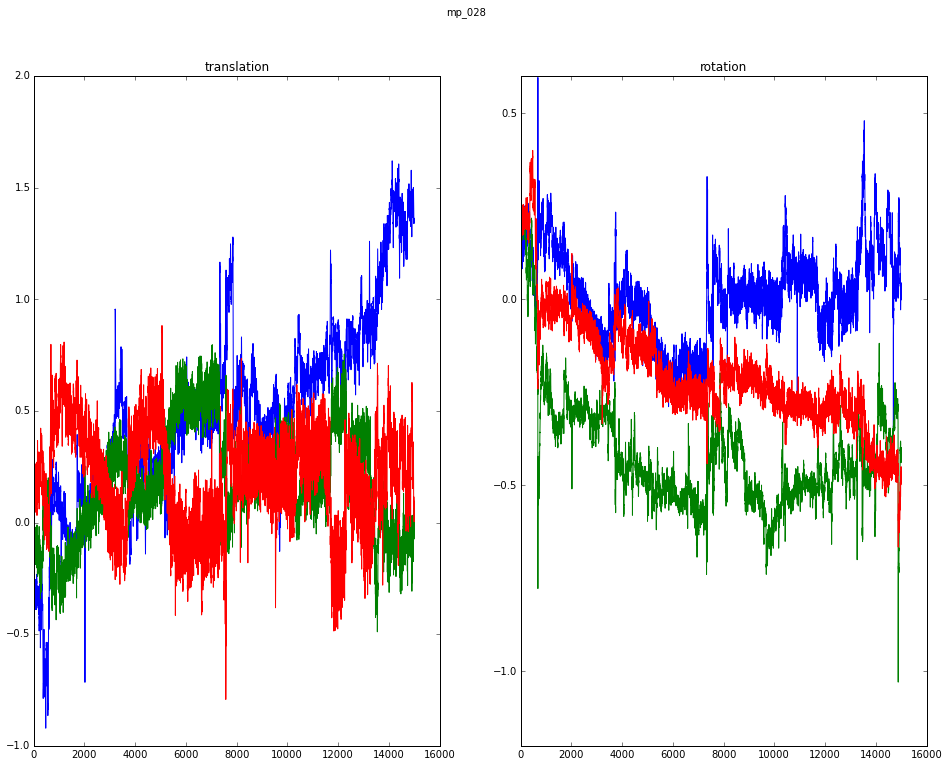

In [5]:
#loop through the original trajectories
for tidx, traj in enumerate(trajectories):
    traj_fname = pjoin(data_dir,orig_fnames[traj])
    data_orig = get_data_orig(traj_fname) 
    print traj, data_orig.shape
    plot_motion(data_orig, traj)


(7501,)
(7501,) (7501,) (7501,)
15000 7501 7500.0 (15000,)
62.5593782533 -232.023473583 0 -232.023473583


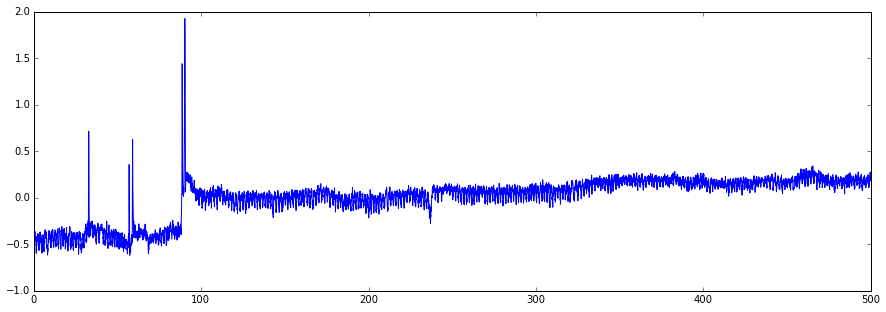

In [97]:
import random
traj_fname = pjoin(data_dir,orig_fnames['mp_026'])
data_orig = get_data_orig(traj_fname) 

TR = 2.
nb_slices = 30
nb_volumes = 500
sampling_rate = nb_slices/TR
Duration = nb_volumes*TR
time = np.arange(0, Duration, 1/sampling_rate)
Ntime = len(time)
Ntime_2 = int(Ntime/2) + 1

x_data = data_orig[:,1]
x_data -= x_data.mean()
x_fft = np.fft.rfft(x_data)

print(x_fft.shape)


power = 20*np.log10(np.abs(x_fft))
ampl = np.abs(x_fft)
phase = np.angle(x_fft)
freq = np.linspace(0, sampling_rate/2., len(power))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
slc = np.s_[:, 1000]
print(freq.shape, power.shape, phase.shape)

#ax.plot(freq, power)
#ax.plot(freq[-500:], power[-500:])
#ax.plot(freq[1:], power[1:])
#ax.plot(freq, ampl)

# ----------Randomize phase ! --------------# 
#random.shuffle(phase)
x_data_recon = np.fft.ifft(ampl * np.exp(1j* phase))
print(len(time), len(x_data_recon), Ntime/2, x_data.shape)
ax.plot(time[:Ntime_2], x_data_recon)
#ax.plot(time[:Ntime_2], x_data[:Ntime_2])

print(power.max(), power.min(), np.argmin(power), power[0])

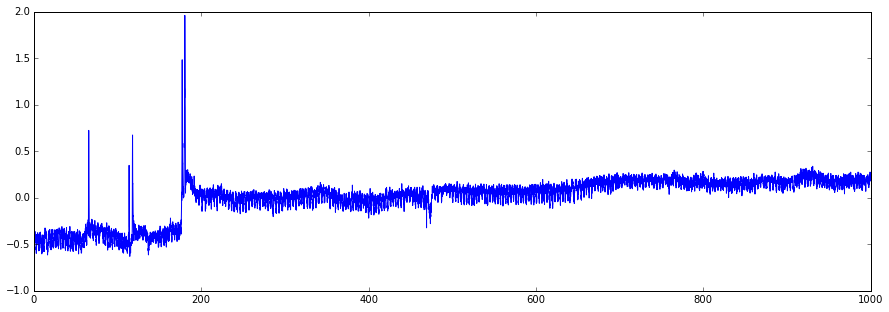

In [98]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

ax.plot(time[:Ntime], x_data[:Ntime])

(15000, 6)
[2709 2707 2708 2710 2706 2705 2711 2715 2714 2713 2716 2712 2704 2717 2718
 2719 2703 2720 2722 2721 2723 2661 2662 2724 2702 2725 2754 2755 2749 2750
 2748 2751 2753 2752 2663 2746 2660 2747 2726 2745 2733 2744 2727 2732 2728
 2734 2735 2731 2664 2729 2730 2736 2737 2743 2738 2756 2739 2659 2742 1773
 2740 2665 2741 2760 1774 2757 2666 2761 2758 2762 2767 2764 2763 2766 2765
 2759 2768 2803 2769 2806 2701 2804 2805 2802 2770 1772 2801 2807 2791 2658
 2789 2790 2800 2792 2808 2667 2771 2788 1778 2795]


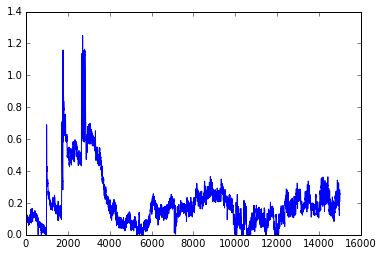

In [116]:
traj_fname = pjoin(data_dir,orig_fnames['mp_026'])
data_orig = get_data_orig(traj_fname) 
print(data_orig.shape)

x_data = data_orig[:,0]
x_data -= x_data.mean()
x_data = np.abs(x_data)

nb_max = 100
max_idx = x_data.argsort()[::-1][:nb_max]
print(max_idx)
x_data[max_idx] *= .50

plt.plot(x_data)


In [171]:
import collections

def select_times_max(data):
    """
    """
    n,p = data.shape
    
    for col in range(p):
        pass
        
    
def reduce_peaks(traj, nb_max=50, reduce_factor=.5, col=0, 
                                  orig_fnames=orig_fnames, nvols=500, nslices=30):
    """
    """
    
    traj_fname = pjoin(data_dir,orig_fnames[traj])
    data_orig = get_data_orig(traj_fname)
    
    x_data = data_orig[:,col]
    x_data -= x_data.mean()
    x_data = np.abs(x_data)

    max_idx = x_data.argsort()[::-1][:nb_max]
    print(max_idx)
    print(data_orig.shape)

    if not isinstance(reduce_factor, collections.Iterable):
        reduce_factor = [reduce_factor]
    
    data_orig = get_data_orig(traj_fname)
    data_mean = data_orig.mean(axis=0)

    for fct in reduce_factor:
        #print(data_orig[max_idx, :].shape)
        data_orig[max_idx, :] = fct*data_orig[max_idx, :] + (1.-fct)*data_mean
        plot_motion(data_orig, traj)

        data_new = slice_avg(data_orig, nvols, nslices)
        plot_motion(data_new, traj+'_'+str(fct))

        out_fname = "tmp_traj_" + str(fct) + ".txt"
        np.savetxt(out_fname, data_new)
    
    


[2709 2707 2708 2710 2706 2705 2711 2715 2714 2713 2716 2712 2704 2717 2718
 2719 2703 2720 2722 2721 2723 2661 2662 2724 2702 2725 2754 2755 2749 2750
 2748 2751 2753 2752 2663 2746 2660 2747 2726 2745 2733 2744 2727 2732 2728
 2734 2735 2731 2664 2729 2730 2736 2737 2743 2738 2756 2739 2659 2742 1773
 2740 2665 2741 2760 1774 2757 2666 2761 2758 2762 2767 2764 2763 2766 2765
 2759 2768 2803 2769 2806 2701 2804 2805 2802 2770 1772 2801 2807 2791 2658
 2789 2790 2800 2792 2808 2667 2771 2788 1778 2795]
(15000, 6)


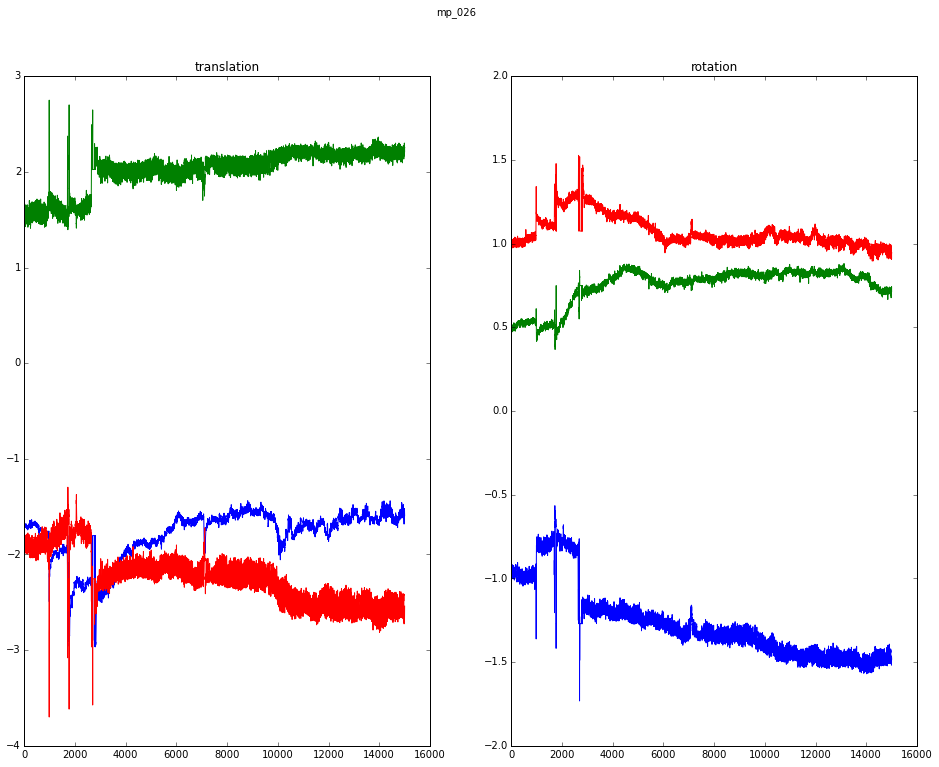

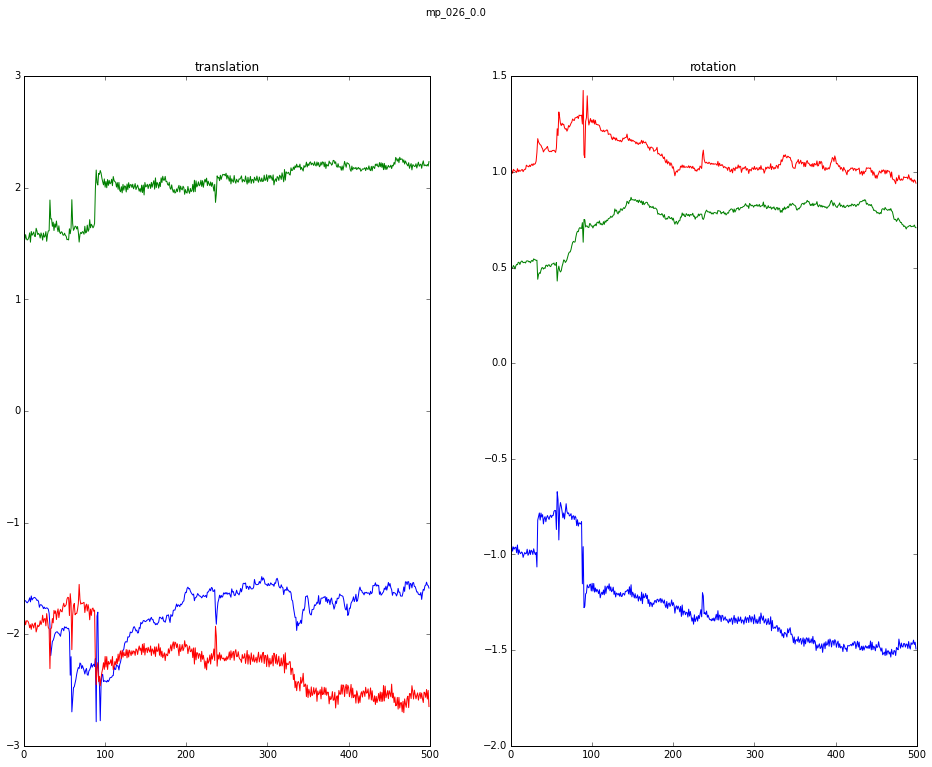

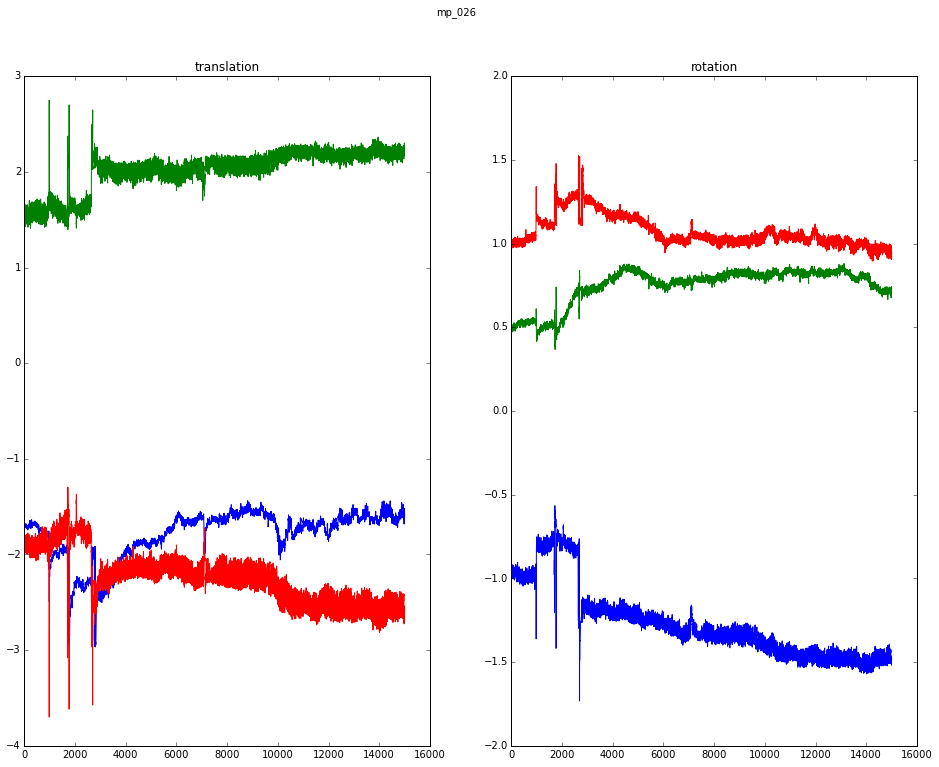

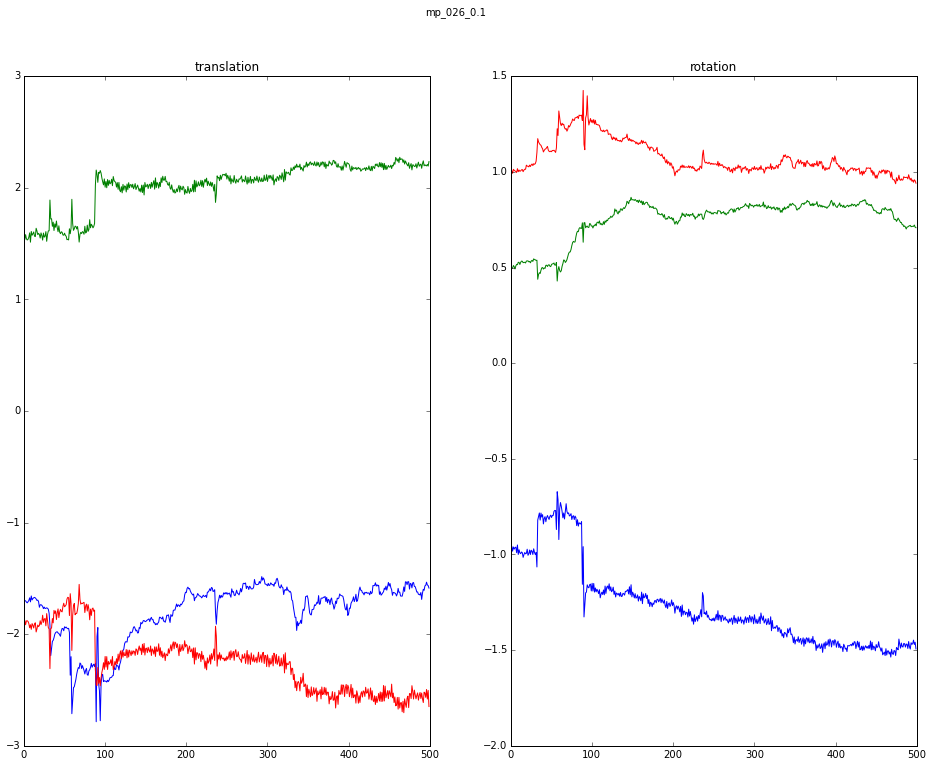

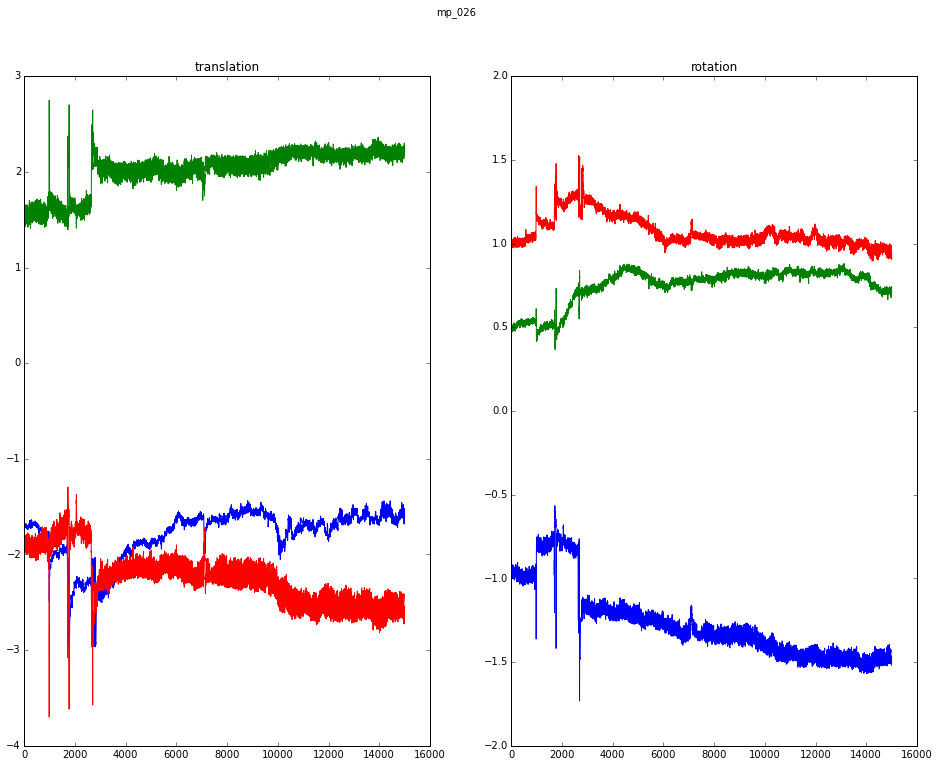

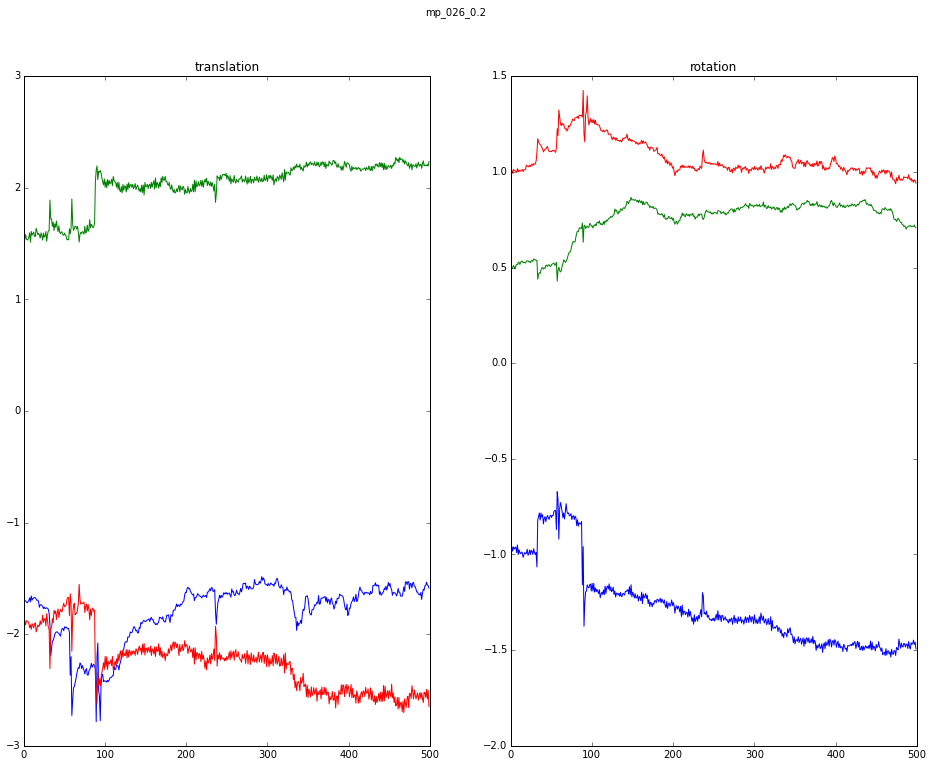

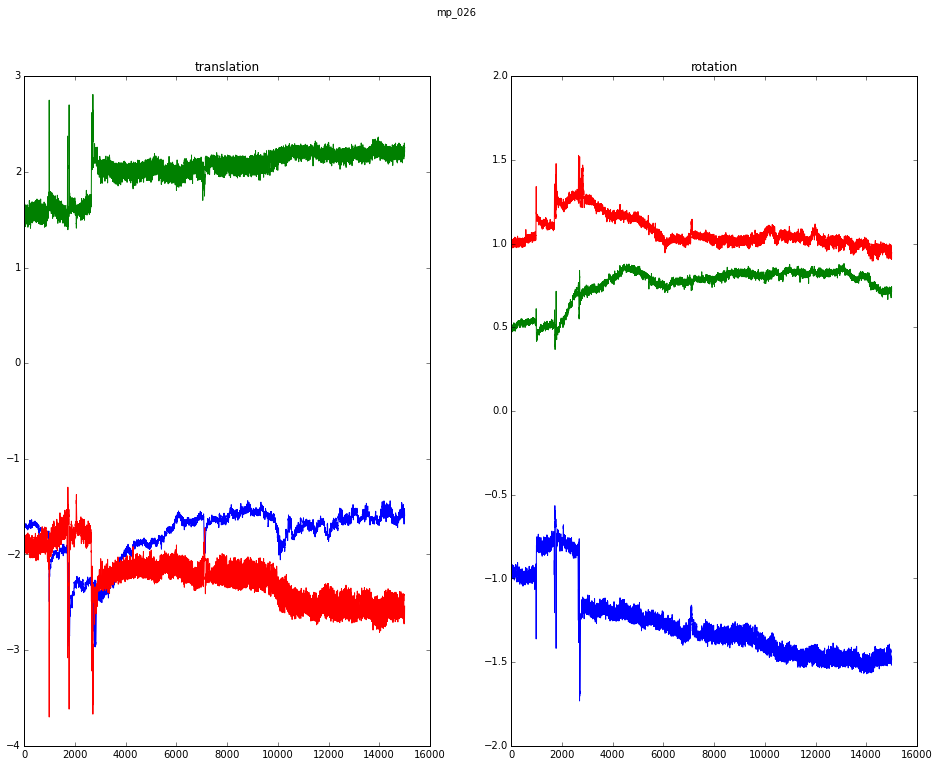

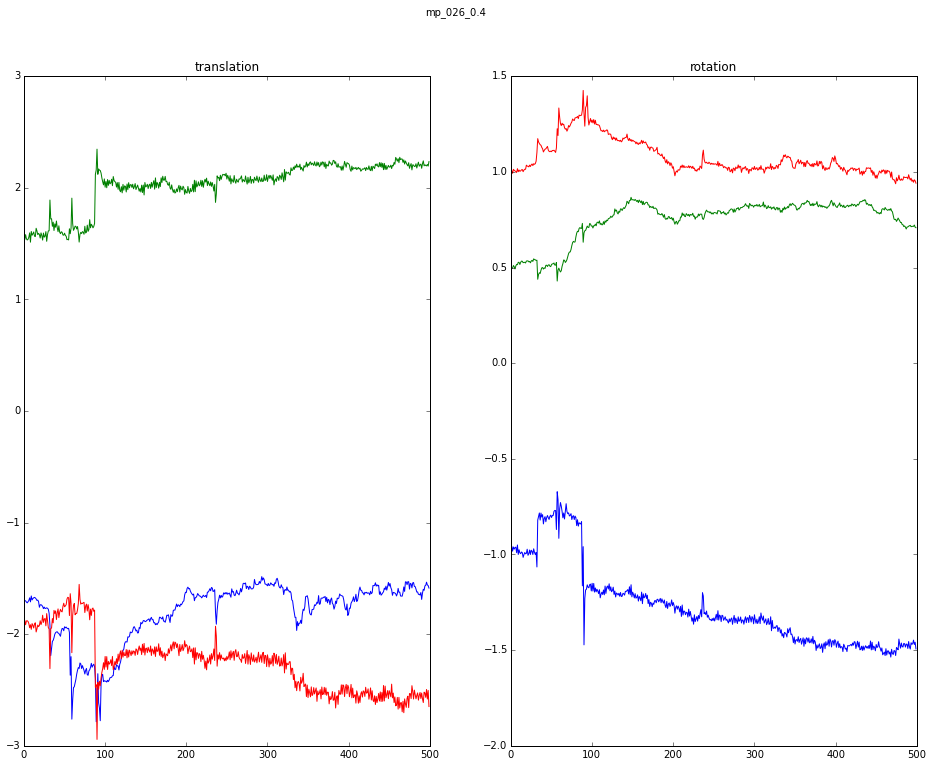

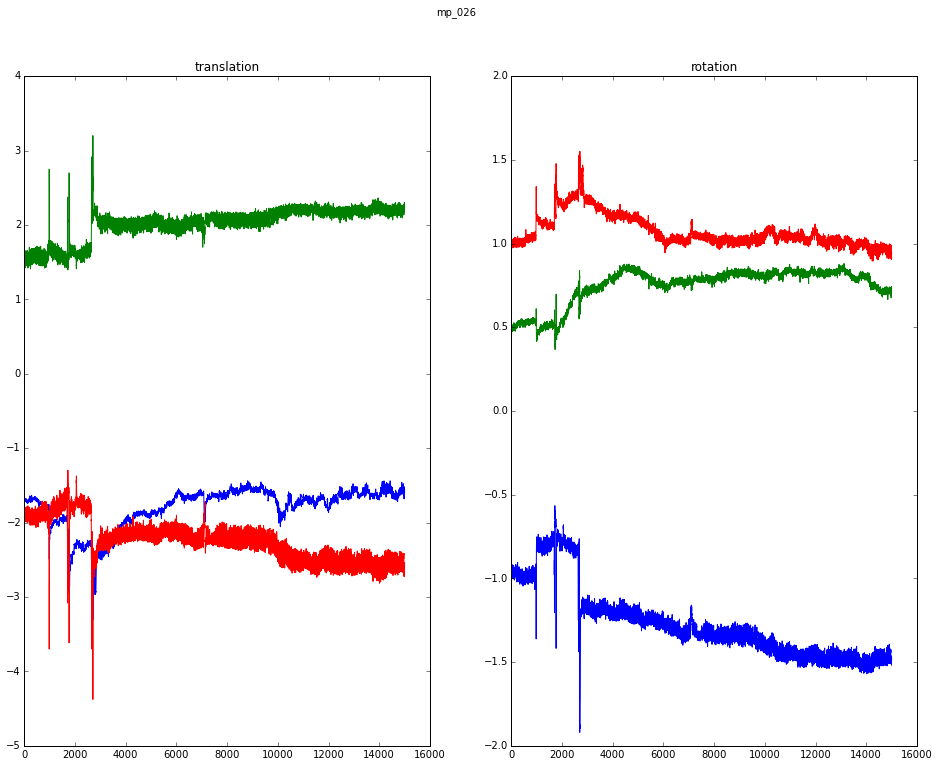

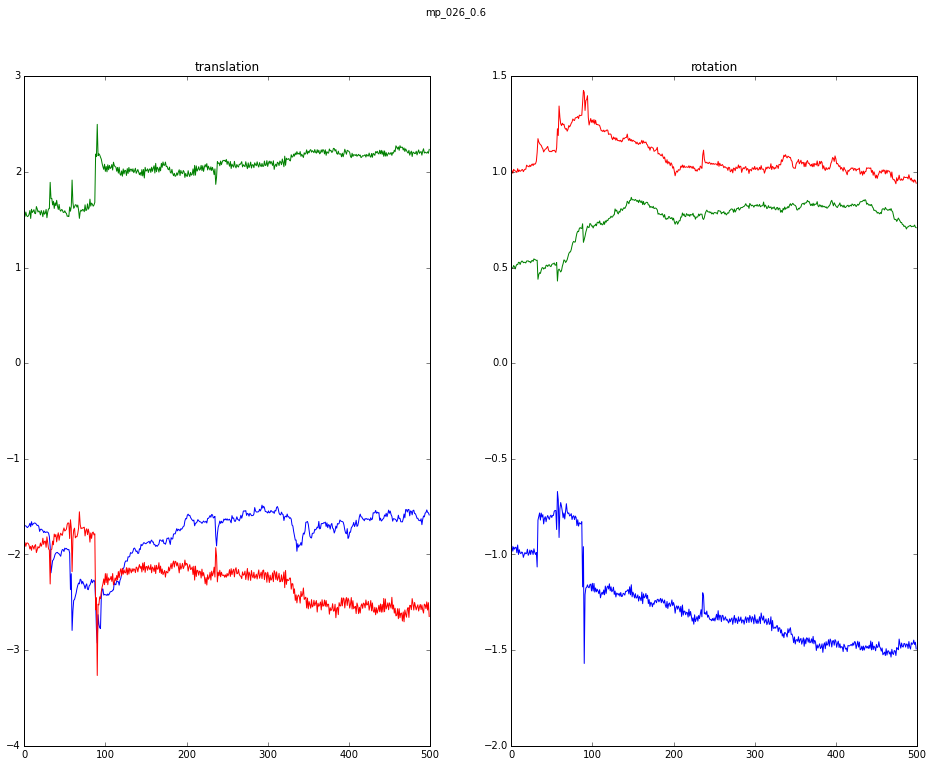

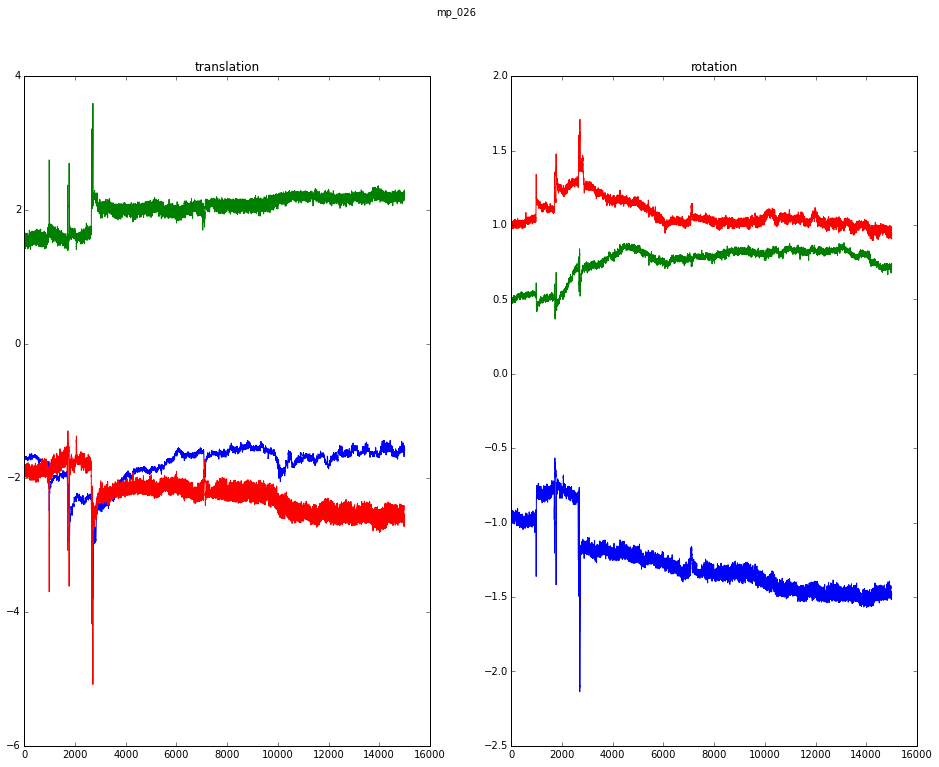

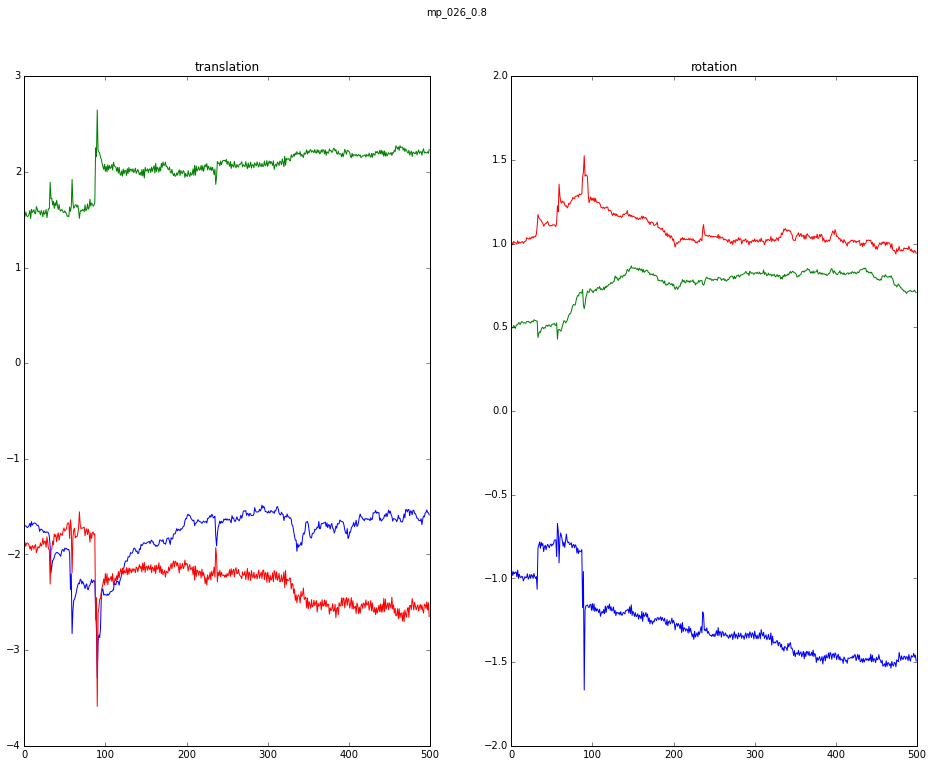

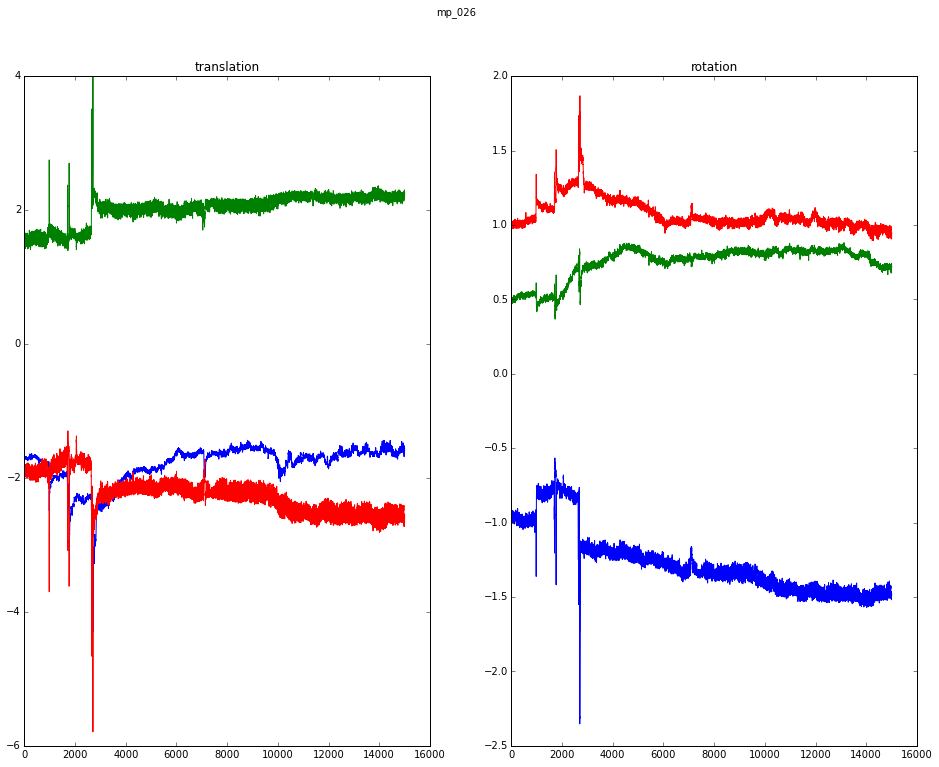

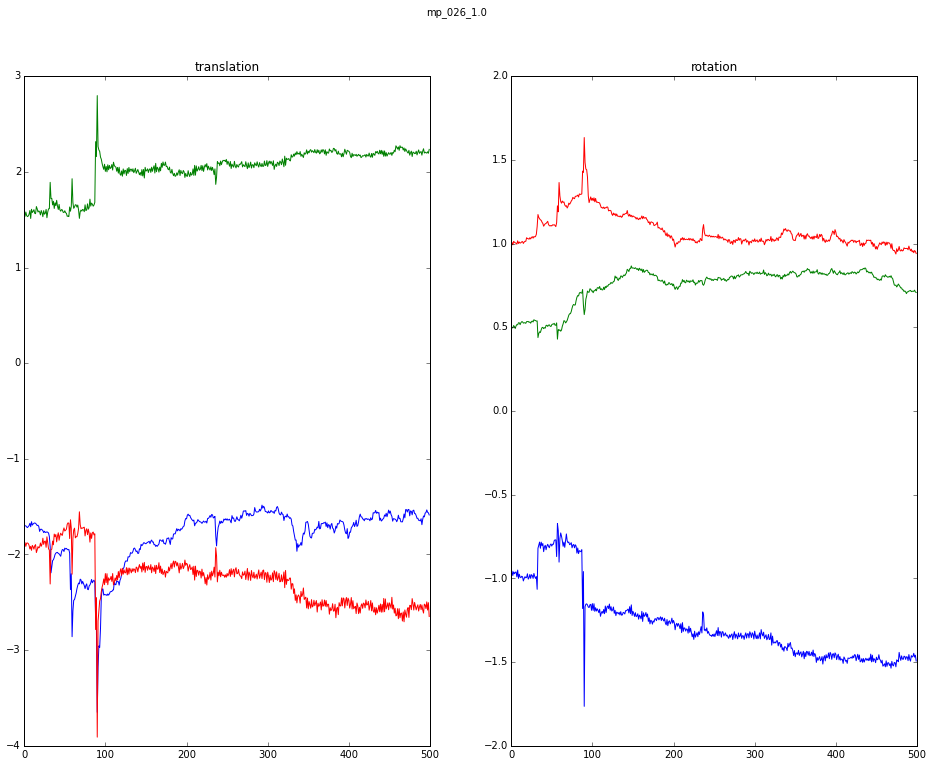

In [173]:
reduce_peaks('mp_026', nb_max=100, reduce_factor=[0., .1, .2, .4, .6, .8, 1.], 
                                                 col=0, orig_fnames=orig_fnames)

mp_013
(15000, 6) (500, 6)


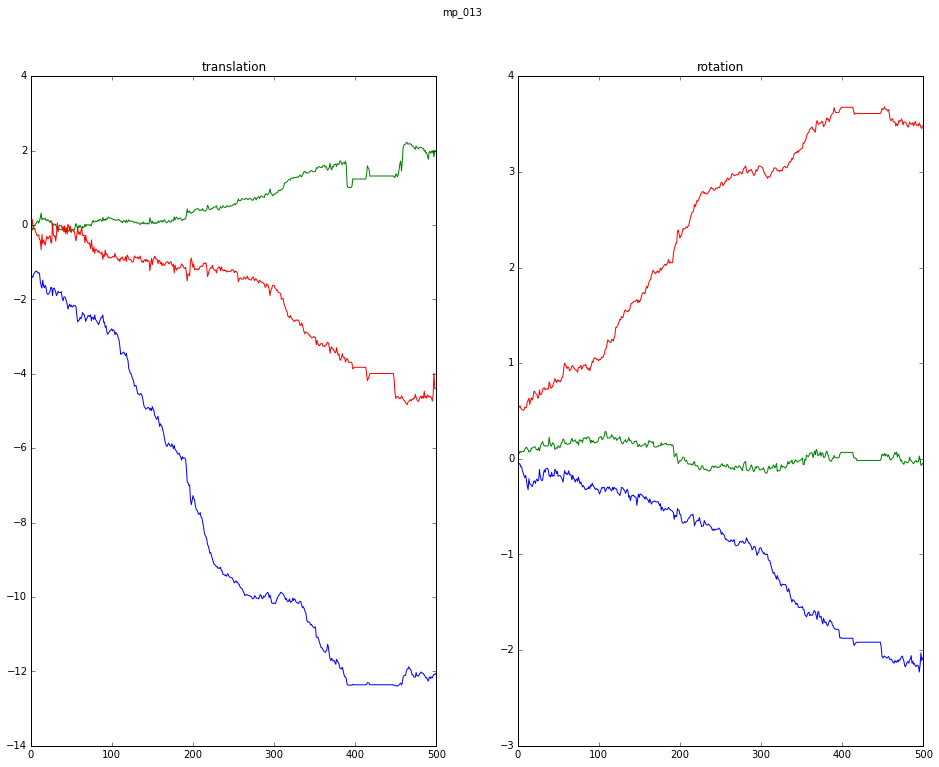

saving  ./trajectories_from_VA/mp_sliceavg_013.txt
mp_026
(15000, 6) (500, 6)


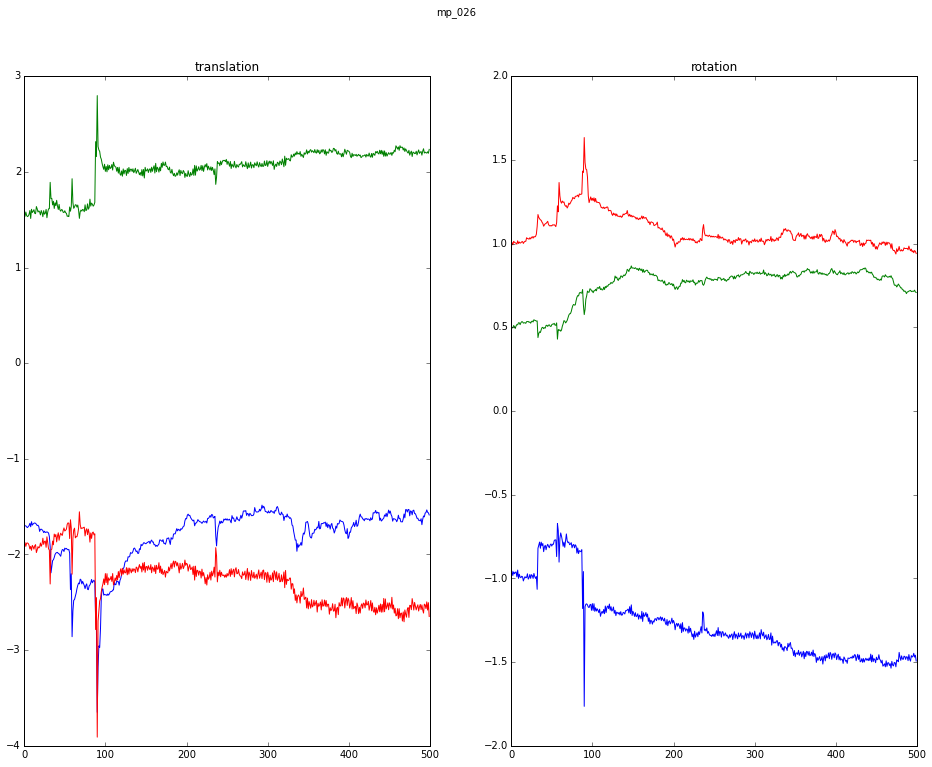

saving  ./trajectories_from_VA/mp_sliceavg_026.txt
mp_028
(15000, 6) (500, 6)


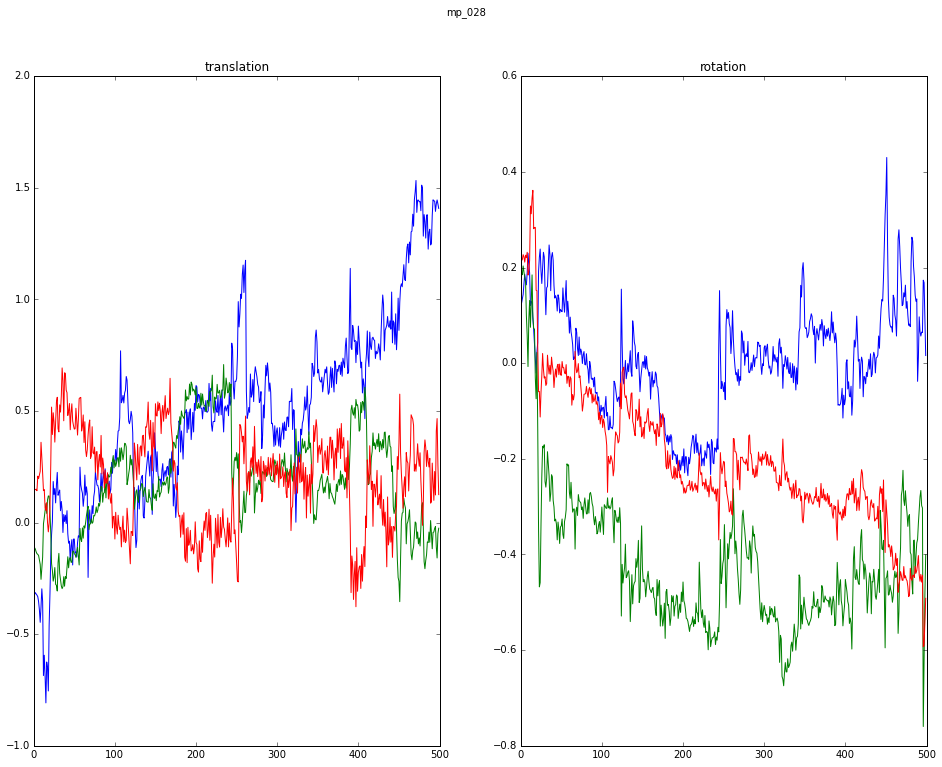

saving  ./trajectories_from_VA/mp_sliceavg_028.txt


In [169]:
#loop through the trajectories, plot slice avg
for tidx, traj in enumerate(trajectories):
    print(traj)
    
    data_orig = get_data_orig(pjoin(data_dir,orig_fnames[traj]))
    data_new = slice_avg(data_orig, nvols, nslices)
    print(data_orig.shape, data_new.shape)
    plot_motion(data_new, traj)
    #save txt file
    out_fname = pjoin(data_dir, new_fnames[traj])
    print("saving ", out_fname)
    np.savetxt(out_fname, data_new)